## Aluno: Fernando Gomes Papi

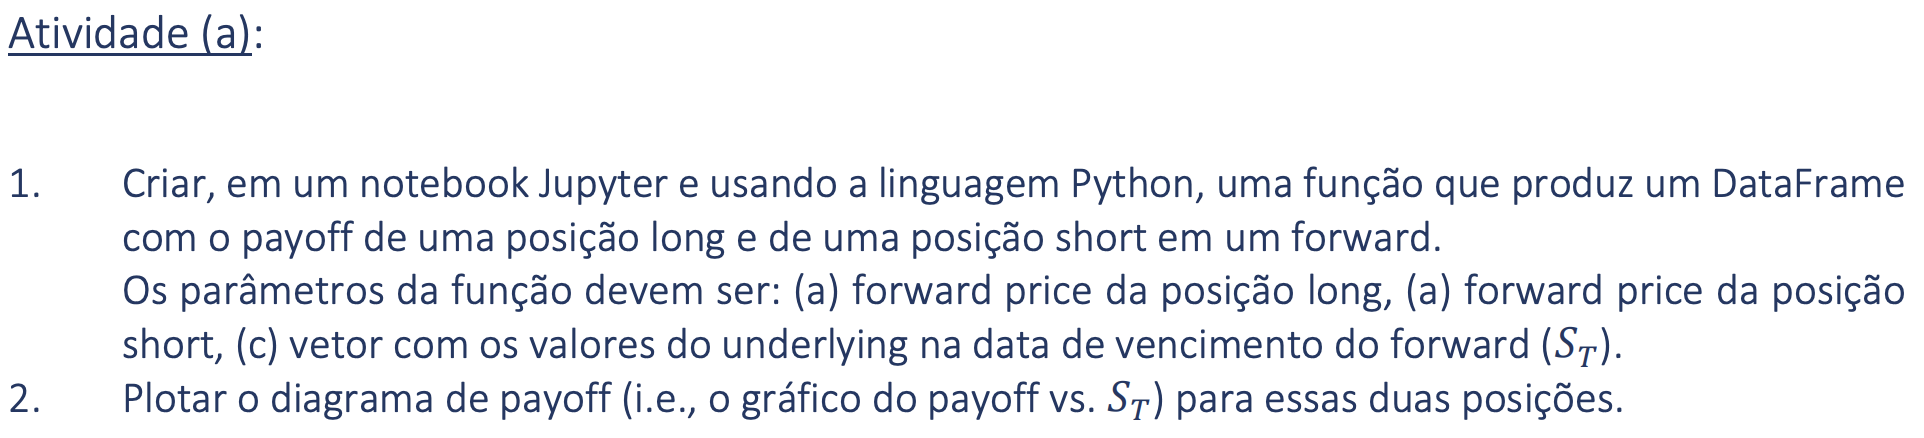

In [3]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def forward_payoff(forward_price_long, forward_price_short, st):
    # Cálculo do payoff para uma posição longa (compradora) no contrato a termo
    payoff_long_forward = st - forward_price_long
    
    # Cálculo do payoff para uma posição curta (vendedora) no contrato a termo
    payoff_short_forward = forward_price_short - st

    # Retorna os payoffs calculados para as posições longa e curta
    return payoff_long_forward, payoff_short_forward

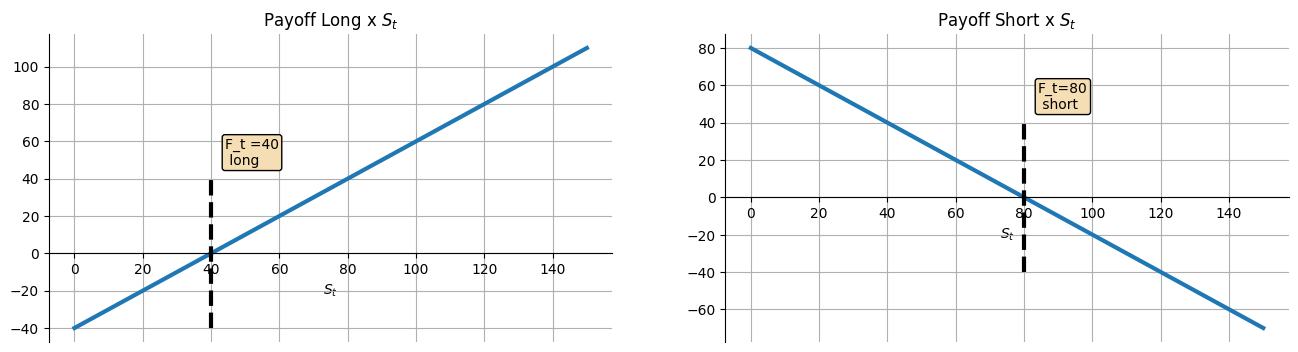

In [5]:
# Define os valores de S_t (preço do ativo subjacente) e o tempo (t)
st = np.linspace(0, 150)
t = np.linspace(0, 120)

# Define o preço de exercício do contrato a termo
T = 80

# Define os preços a termo longo e curto
Ft_long = 40  # Preço a termo longo
Ft_short = 80  # Preço a termo curto

# Calcula os payoffs para as posições longa e curta no contrato a termo
payoff_long_forward, payoff_short_forward = forward_payoff(Ft_long, Ft_short, st)

# Cria uma figura com dois subgráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
ax, ax1 = axs

# Configura o primeiro subgráfico para o payoff longo
ax.set_title('Payoff Long x $S_t$')
ax.plot(st, payoff_long_forward, lw=3)
ax.plot([Ft_long, Ft_long], [-40, 40], 'k--', lw=3)
ax.annotate(f'F_t ={Ft_long}\n long', (Ft_long, 40),
            textcoords="offset points",
            xytext=(10, 10), ha='left',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
ax.set_xlabel("$S_t$")

# Configura o segundo subgráfico para o payoff curto
ax1.set_title('Payoff Short x $S_t$')
ax1.plot(st, payoff_short_forward, lw=3)
ax1.plot([Ft_short, Ft_short], [-40, 40], 'k--', lw=3)
ax1.annotate(f'F_t={Ft_short}\n short', (Ft_short, 40),
            textcoords="offset points",
            xytext=(10, 10), ha='left',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
ax1.set_xlabel("$S_t$")

# Configurações estilísticas e formatação dos subgráficos
for ax in axs:
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid()

# Exibe os gráficos
plt.show()





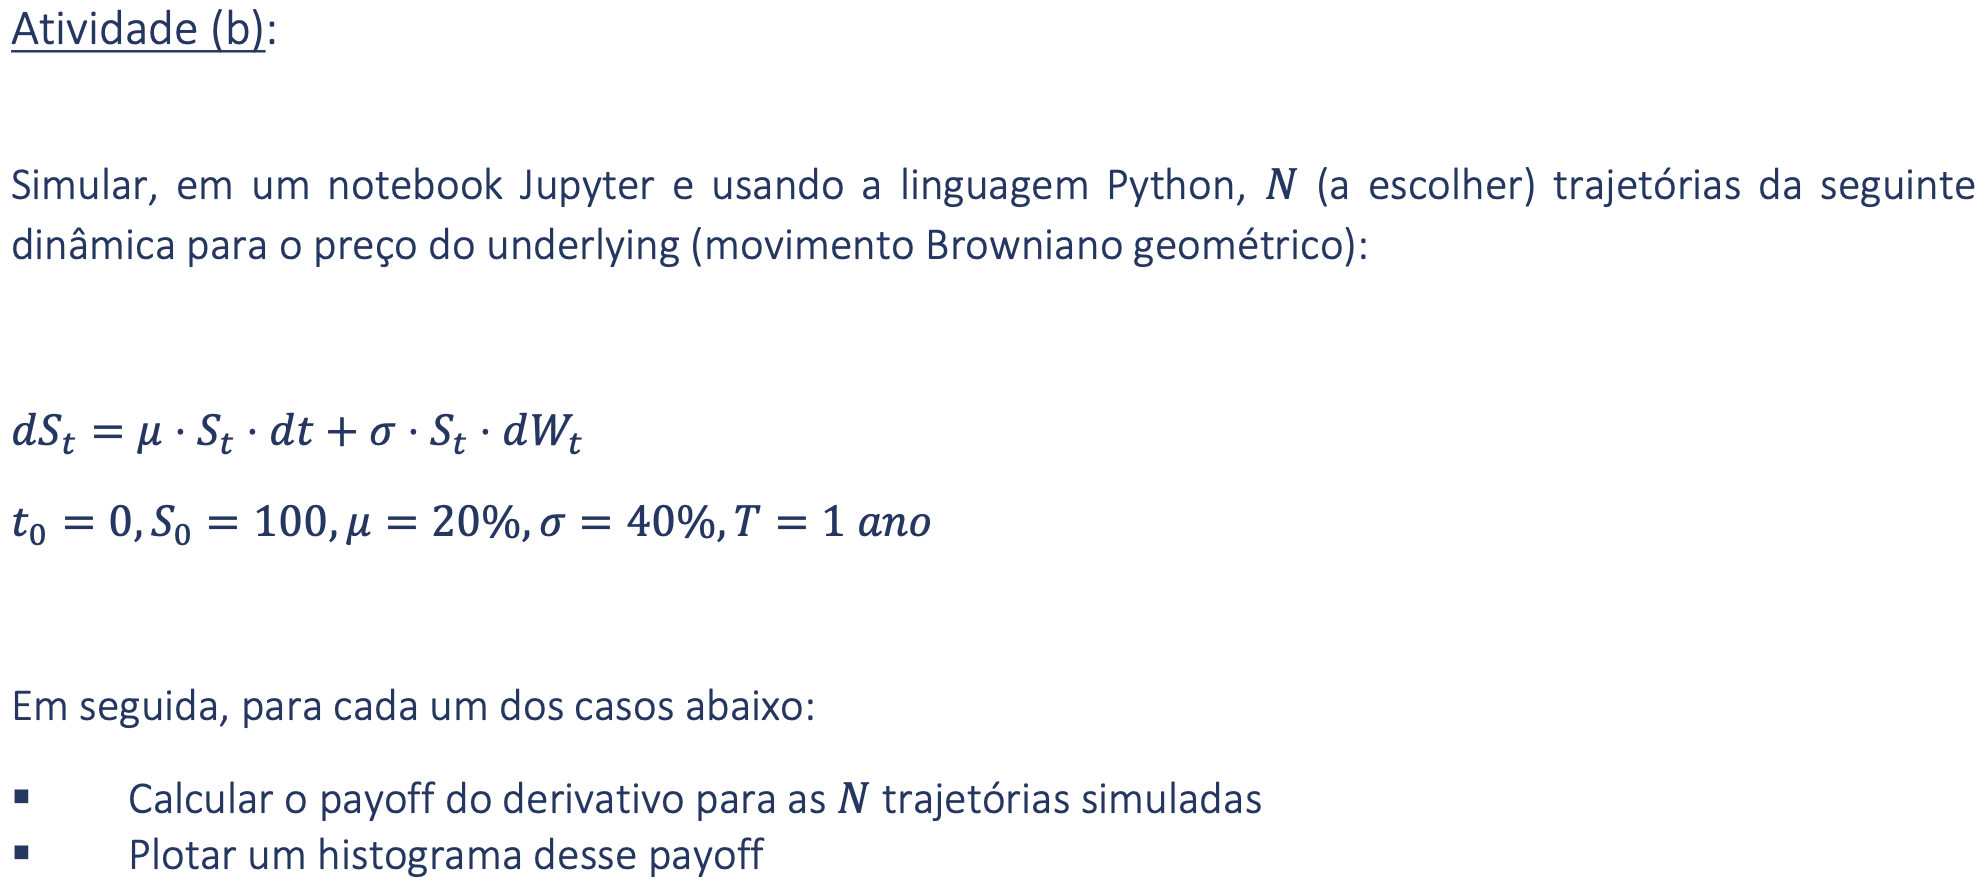

In [6]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

In [7]:
from aleatory.processes import GBM

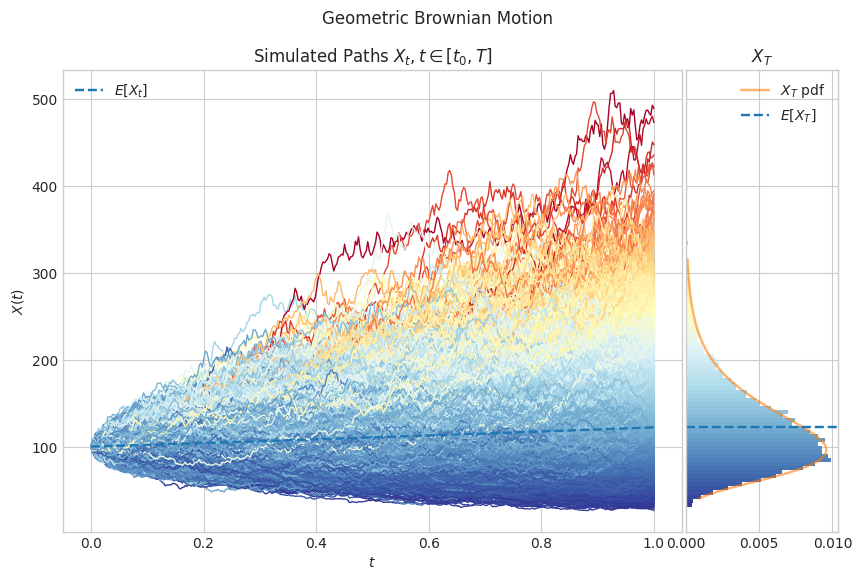

In [8]:
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)

fig_kw = {'figsize':(10,6)}
fig = gbm.draw(envelope=True, n = 365, N=10000 ,**fig_kw)

In [9]:
# all paths as a dataframe where rows are t and columns are each price path
gbm_paths_df = pd.DataFrame(np.array(gbm.paths).T)
gbm_paths_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,97.764621,103.101054,96.913914,99.826070,98.998625,101.414329,100.646809,102.048880,101.887488,99.060360,...,104.802067,98.782694,96.615575,101.737677,94.657683,101.889695,100.935131,97.307411,101.055568,95.792238
2,96.909628,102.602900,95.661316,99.098045,98.968126,100.479041,98.218645,100.840773,102.221259,97.273388,...,107.143322,98.172371,98.160799,101.001917,95.689685,100.642099,104.727700,97.486047,101.786634,97.227587
3,97.709727,101.258116,93.496873,98.164534,97.507816,97.893277,95.563732,102.717483,103.866832,98.832263,...,103.623802,98.438888,97.024286,98.843214,95.151624,96.977183,100.396035,96.296319,99.809763,98.476001
4,97.187123,102.828351,90.619362,98.000088,99.490584,96.477426,96.769008,101.920832,105.119429,96.894252,...,102.861329,97.155235,98.690249,98.465975,97.471506,98.459257,99.129966,97.175997,102.640951,99.703300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,145.045799,155.380800,95.847843,69.742738,90.449987,96.539906,135.779685,112.432021,177.753693,249.580051,...,103.197038,113.555778,77.712960,148.849946,270.857045,213.264881,129.339660,99.056569,128.822075,115.496553
361,140.052422,158.598209,91.629893,68.815979,93.514551,102.200009,134.802163,110.644463,173.392611,250.595762,...,104.899355,113.885131,77.074513,143.559457,269.911556,218.424420,131.251241,94.908498,123.829152,116.110505
362,142.989659,160.663396,89.462459,66.350842,96.184110,104.452998,134.114833,114.322502,173.586880,258.690569,...,101.353007,112.918156,77.002870,138.981669,263.454722,226.097706,132.743951,94.385559,122.180912,115.978377
363,139.411500,163.664483,89.058138,66.812800,95.023880,108.852972,130.882405,110.961444,176.537743,263.196947,...,98.580276,116.714980,76.843895,138.842236,270.611326,229.054314,133.724156,94.887516,122.094904,114.732980


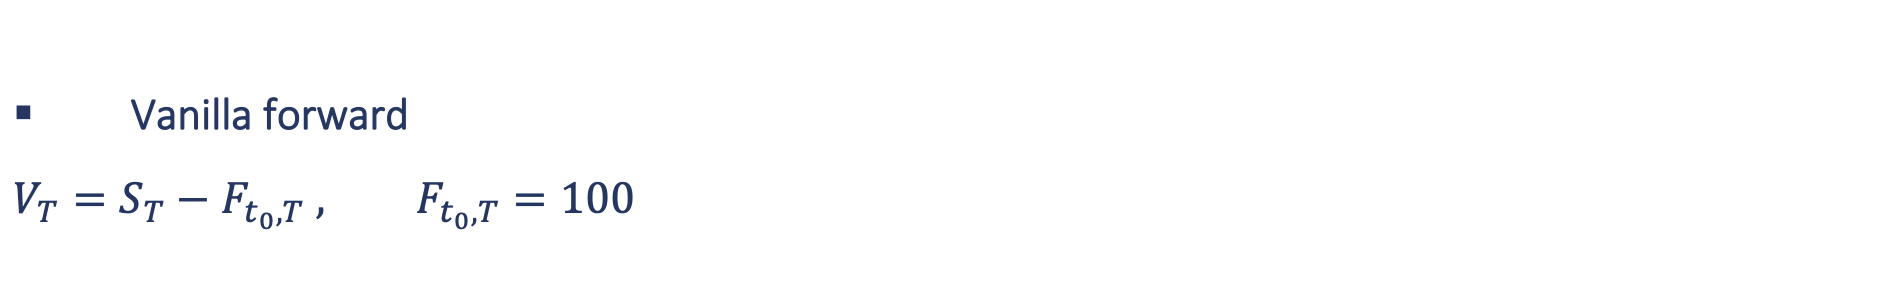

In [10]:
def plot_histogram(payoffs, title):
    # Define o estilo para o gráfico (opcional)
    plt.figure(figsize=(8, 8))
    sns.set(style="whitegrid")
    
    # Cria um histograma
    sns.histplot(payoffs, kde=True, color='blue', bins=50)
    max_h = max(np.histogram(payoffs, bins=50)[0])
    
    # Adiciona uma linha tracejada para representar a média dos payoffs
    plt.plot([np.mean(payoffs), np.mean(payoffs)], [0, max_h], c='orangered', ls='--', lw=3, zorder=4)
    
    # Anota a média dos payoffs no gráfico
    plt.annotate(f'E(x)={np.mean(payoffs):.2f}\n', (np.mean(payoffs), max_h),
            textcoords="offset points",
            xytext=(10, 0), ha='left', va='top',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
    
    # Adiciona rótulos e um título (personalize conforme necessário)
    plt.xlabel("Payoff")
    plt.ylabel("Contagem de Payoffs")
    plt.title(title)
    
    # Mostra o gráfico
    plt.show()


In [11]:
F_t = 100 # forward price

def payoff_forward_vanilla(final_price, forward_price):
    return final_price - forward_price

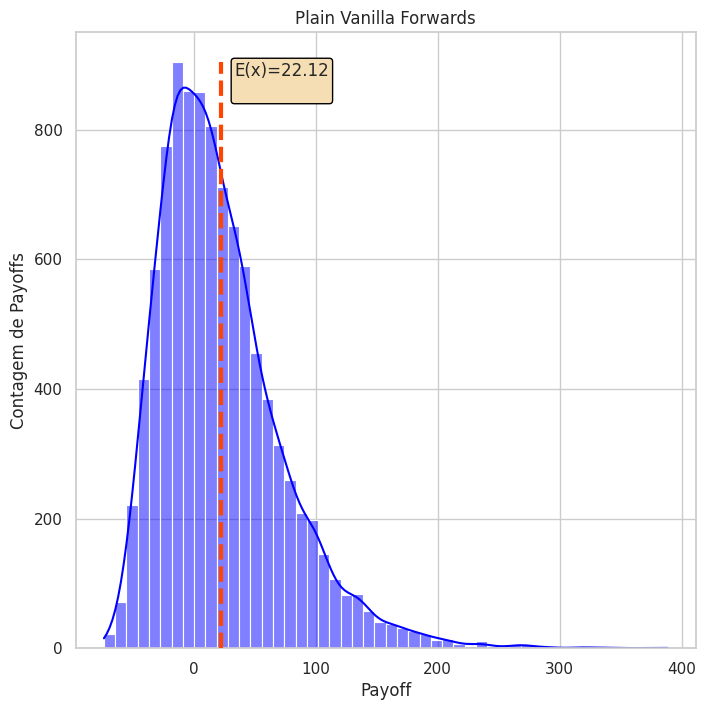

In [12]:
# final value of each price path
final_values = gbm_paths_df.iloc[-1]

# calculate all payoffs for vanilla call options
payoffs_vanilla = final_values.apply(lambda x: payoff_forward_vanilla(x, F_t))
# plot histogram
plot_histogram(payoffs_vanilla, 'Plain Vanilla Forwards')

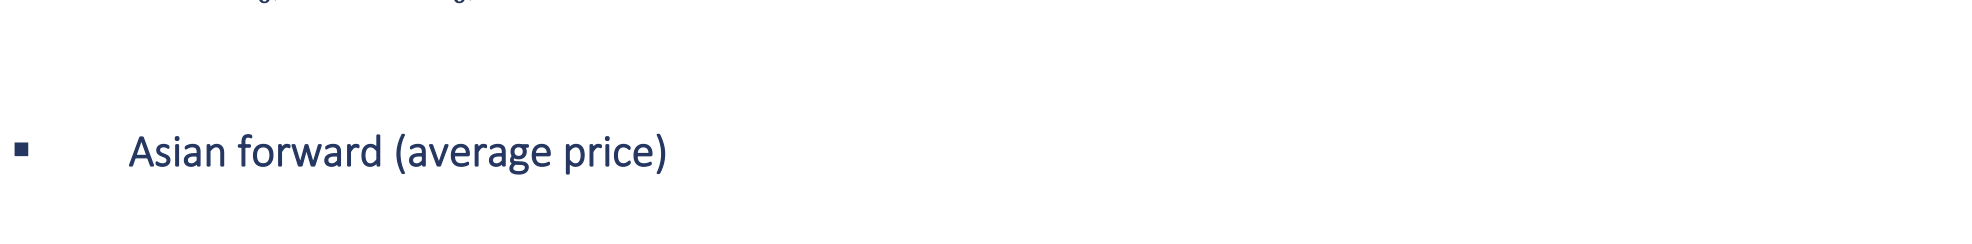
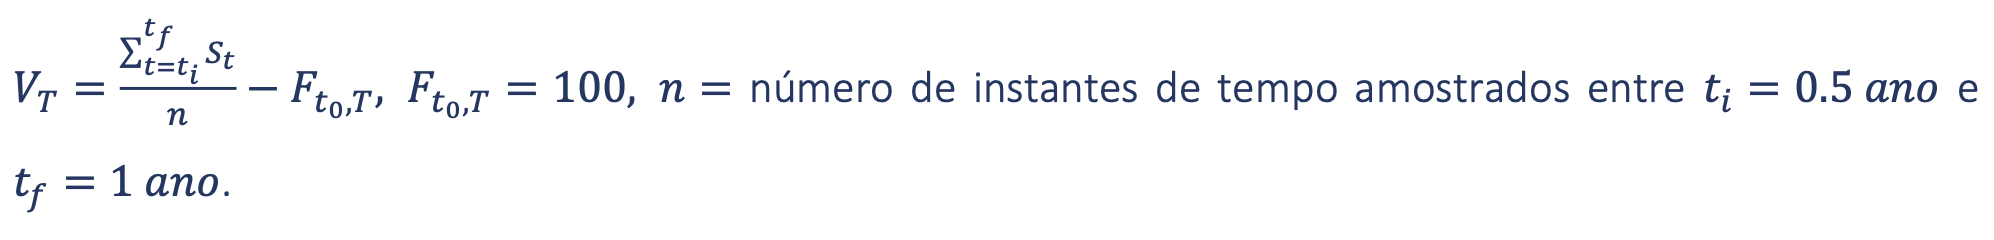

In [13]:
# Preço a termo (Forward Price)
F_t = 100

def payoff_asian_forward(prices, forward_price):
    # Calcula a média dos preços no caminho de preço
    avg_price = np.mean(prices)
    
    # Calcula o payoff da opção de compra de estilo asiático com preço a termo
    payoff = avg_price - forward_price
    
    # Retorna o payoff calculado
    return payoff

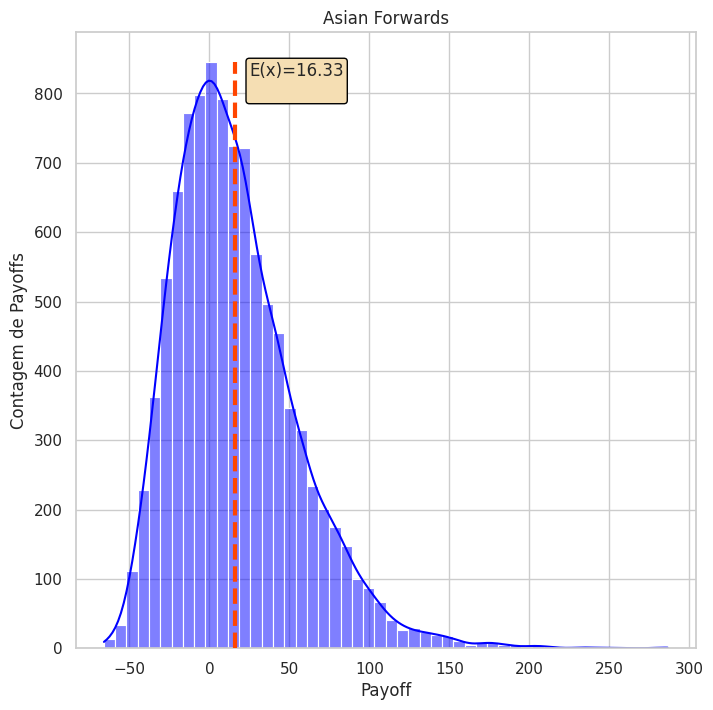

In [14]:
# Calcula o número de pontos no caminho de preço (n), onde n é igual a metade do tempo T
n = int(0.5 * len(gbm_paths_df))  # Número de pontos = metade do comprimento do DataFrame (364/2 pontos)

# Seleciona os últimos n valores do caminho de preço
price_values = gbm_paths_df.iloc[-n:]

# Calcula os payoffs das opções de compra de estilo asiático com preço a termo
asian_payoffs = price_values.apply(lambda x: payoff_asian_forward(x, F_t))

# Gera um histograma dos payoffs das opções de compra de estilo asiático com preço a termo (Asian Forwards)
plot_histogram(asian_payoffs, 'Asian Forwards')

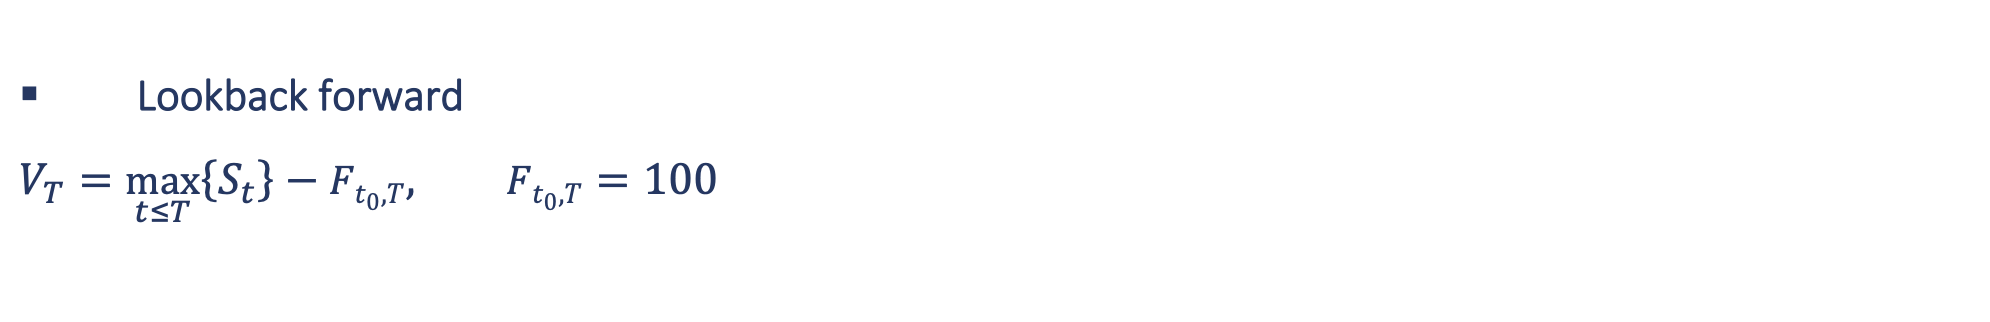

In [15]:
# Preço a termo (Forward Price)
F_t = 100

def payoff_lookback_forward(prices, forward_price):
    # Obtém o preço máximo no caminho de preço
    max_price = max(prices)
    
    # Calcula o payoff da opção de compra de estilo "lookback" com preço a termo
    payoff = max_price - forward_price
    
    # Retorna o payoff calculado
    return payoff

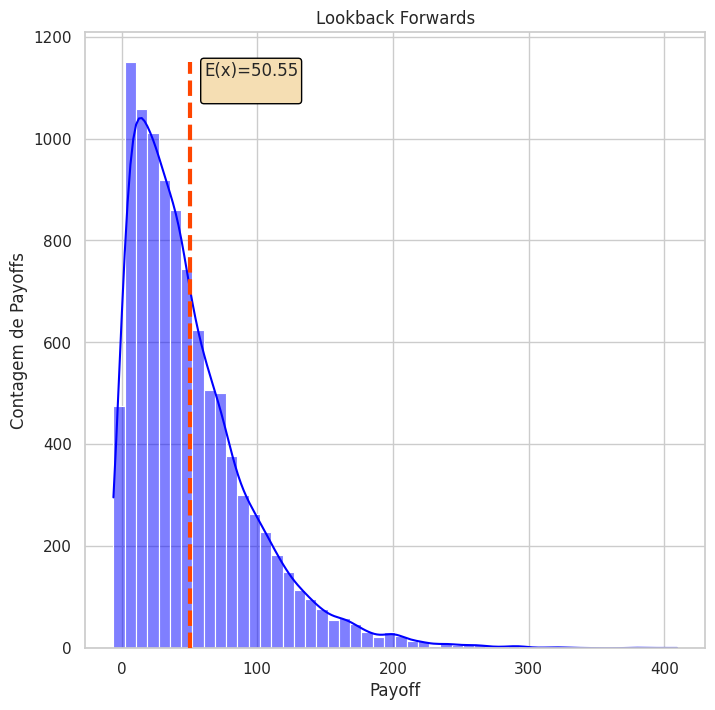

'Como o preço inicial é 100 e o preço a termo (forward price) é 100, max(St) será sempre maior ou igual a 100,\ne o payoff será sempre maior ou igual a 0.'

In [16]:
# Seleciona todo o caminho de preço (excluindo a primeira linha)
price_values = gbm_paths_df[1:]

# Calcula os payoffs das opções de compra de estilo "lookback" com preço a termo
payoffs_lookback = price_values.apply(lambda x: payoff_lookback_forward(x, F_t))

# Gera um histograma dos payoffs das opções de compra de estilo "lookback" com preço a termo (Lookback Forwards)
plot_histogram(payoffs_lookback, 'Lookback Forwards')

# Comentário explicando a característica do payoff devido ao preço inicial e ao preço a termo
'''Como o preço inicial é 100 e o preço a termo (forward price) é 100, max(St) será sempre maior ou igual a 100,
e o payoff será sempre maior ou igual a 0.'''

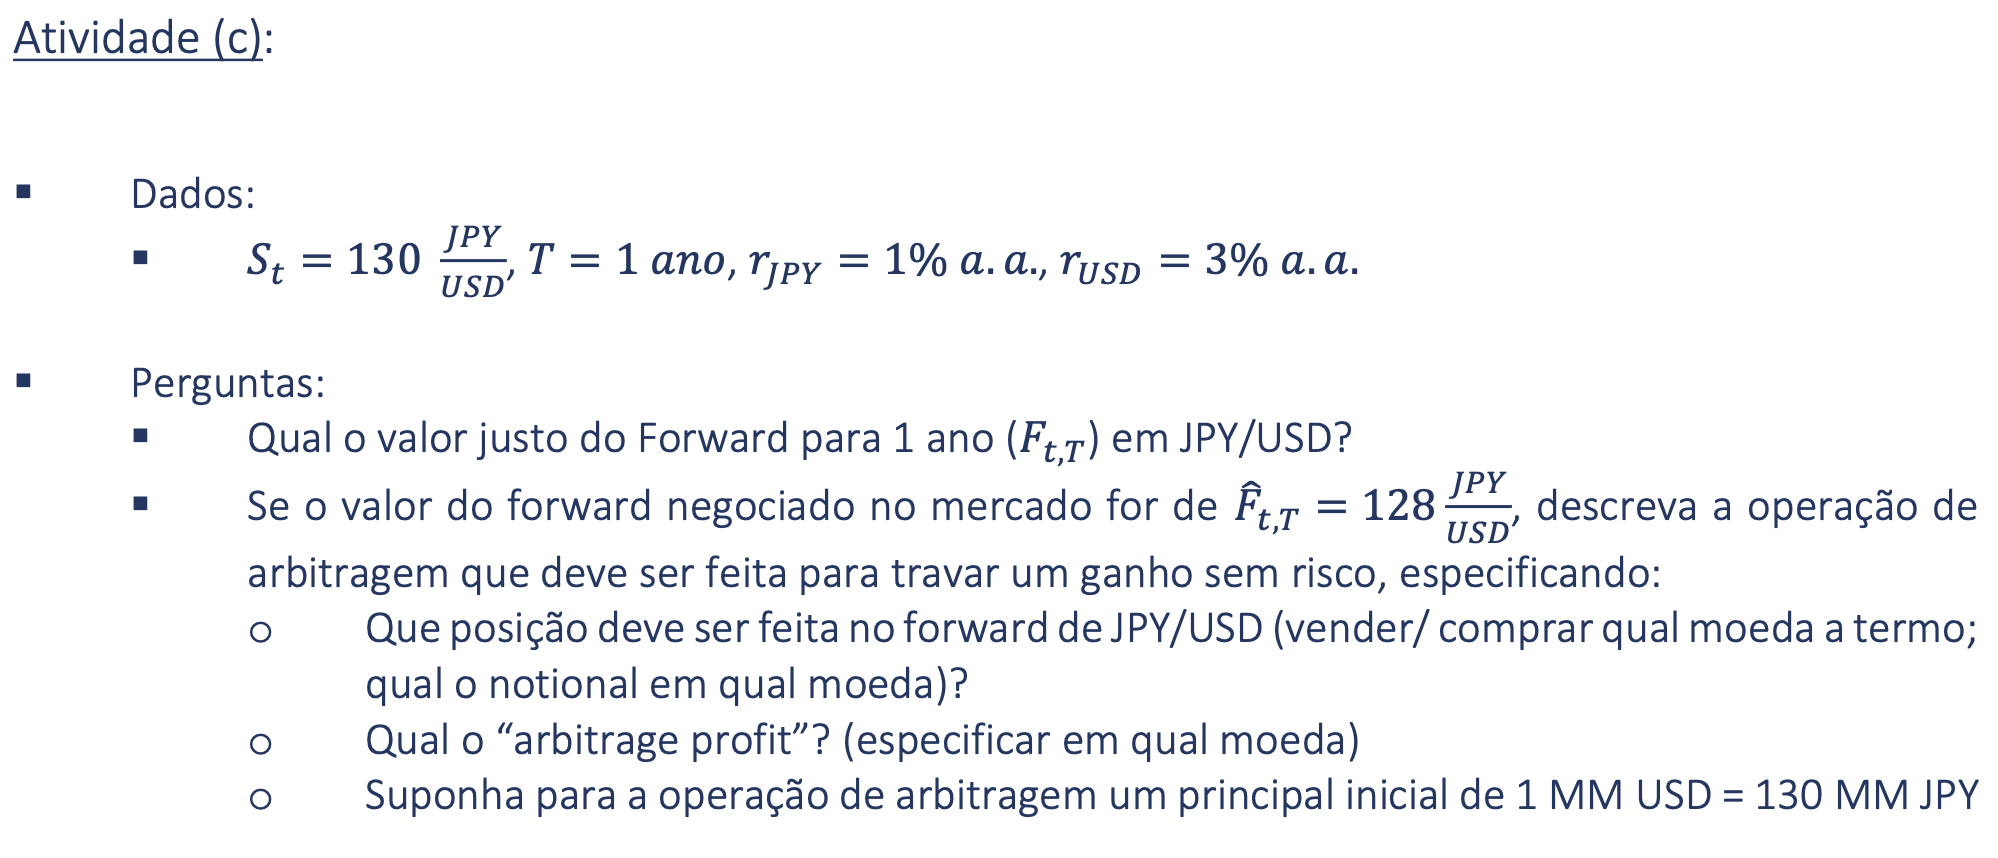

Assumindo que $S_t$ é o valor do câmbio hoje:

In [17]:
def cont_compound(x, r, t):
    # Calcula o crescimento contínuo do valor x ao longo do tempo usando a fórmula de juro composto contínuo
    # x é o valor inicial
    # r é a taxa de crescimento contínua
    # t é o tempo
    return x * np.exp(r * t)

In [18]:
# Definindo a moeda base e a taxa de juros da moeda base
base = 'JPY'
r_base = 0.01

# Definindo a moeda de cotação e a taxa de juros da moeda de cotação
quote = 'USD'
r_quote = 0.03

# Taxa de câmbio entre a moeda base e a moeda de cotação
base_quote = 130  # base/quote
T = 1  # Tempo em anos

# Calculando o preço forward justo com base nas taxas de juros e na taxa de câmbio
Ft = base_quote * np.exp((r_base - r_quote) * T)
print(f'Preço Forward Justo: {Ft :.4f} {base}/{quote}')
print()

# Preço de referência para um contrato futuro
f_hat = 128

# Definindo as taxas de empréstimo para as moedas
borrow_quote = 0
borrow_base = 1_000_000

# Calculando a dívida da moeda base após um período de tempo
debt_base_t = cont_compound(borrow_base, r_base, T)

# Calculando a dívida equivalente em moeda de cotação
debt_quote_t = debt_base_t * 1/f_hat

# Calculando o valor inicial em moeda de cotação
initial_quote = borrow_base * 1/base_quote

# Calculando o valor final em moeda de cotação após investimento a uma taxa de juros
final_quote = cont_compound(initial_quote, r_quote, T)

# Calculando o valor final em moeda base
final_base = final_quote * f_hat

# Calculando o lucro resultante da arbitragem
profit = final_quote - debt_quote_t

# Imprimindo informações sobre a estratégia de arbitragem
print(f'Empresta {borrow_base} {base} a {r_base*100}% por {T} ano(s)')
print(f'Converte para {initial_quote :.2f} {quote} @ {1/base_quote :.4} 1/({base}/{quote}) e investe {quote} a {r_quote*100}%')
print()
print(f'Entra em um contrato futuro para VENDER {debt_quote_t :.2f} {quote} @ {f_hat} {base}/{quote}')
print(f'Notional: {debt_quote_t * f_hat :.2f} {base}')
print()
print(f'Em T={T}: Dívida = {debt_base_t :.2f} {base}')
print(f'Em T={T}: Final Investido = {final_quote :.2f} {quote}')
print(f'Em T={T}: Compensação em {base}:')
print(f'\t Vende {debt_quote_t :.2f} {quote} @ {f_hat} {base}/{quote} = {debt_quote_t*f_hat :.2f} {base} e liquida a dívida')
print()
print(f'-- Arbitrage Profit: {final_quote :.2f} - {debt_quote_t :.2f} = {profit :.2f} {quote}')



Preço Forward Justo: 127.4258 JPY/USD

Empresta 1000000 JPY a 1.0% por 1 ano(s)
Converte para 7692.31 USD @ 0.007692 1/(JPY/USD) e investe USD a 3.0%

Entra em um contrato futuro para VENDER 7891.02 USD @ 128 JPY/USD
Notional: 1010050.17 JPY

Em T=1: Dívida = 1010050.17 JPY
Em T=1: Final Investido = 7926.57 USD
Em T=1: Compensação em JPY:
	 Vende 7891.02 USD @ 128 JPY/USD = 1010050.17 JPY e liquida a dívida

-- Arbitrage Profit: 7926.57 - 7891.02 = 35.56 USD


Ps.: Nesse caso, especifiquei o lucro em dólar, ou seja, o contrato cobriria apenas a dívida contraída em JPY. Poderia-se converter todo o valor recebido do investimento em USD (principal + juros) através de um mesmo instrumento de VENDA de USD @ 128 JPY/USD, com notional de 1014600.96 JPY (7926.57 USD)